In [4]:
# Jared Robinson, Ethan Neitkze, Michael Dittman

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

In [14]:
# Part 1 number 7 and 8
#step, time, x_0, v_0, mass, V0, d
def cromer(step, time,x_0,v_0,mass,V0,d):
    #how many indices will we need?
    n = math.ceil(time/step)
    
    #create the arrays
    t = np.zeros(n)
    v = np.zeros(n)
    x = np.zeros(n)
    
    #assign our initial conditions
    x[0]=x_0
    v[0]=v_0
    
    for i in range(n-1):
        #update acceleration
        a = (-V0/d**4)*(4*(x[i]**3)-(4*x[i]*(d**2)))/mass
    
        #update everything else
        v[i+1] = v[i] + step*a
        x[i+1] = x[i] + step*v[i+1]
        t[i+1] = t[i] + step
    
    fig, ax = plt.subplots()
    ax.plot(t,x)
    ax.set_title("Position vs. Time")
    fig, axs = plt.subplots()
    axs.plot(t,v, color='orange')
    axs.set_title("Velocity vs. Time")
    

In [15]:
# Euler-Cromer methods

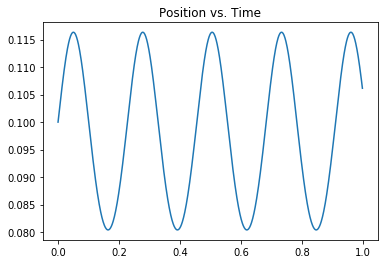

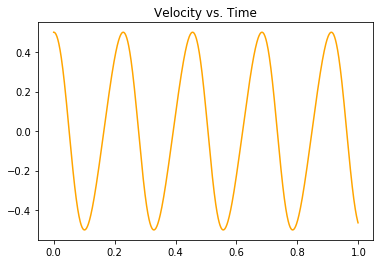

In [16]:
#step, time, x_0, v_0, mass, V0, d
cromer(.001,1,.1,.5,1,1,.1)

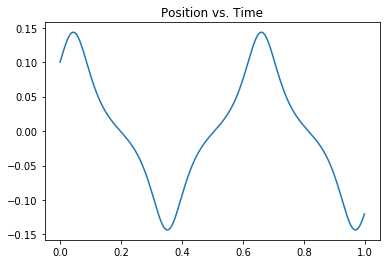

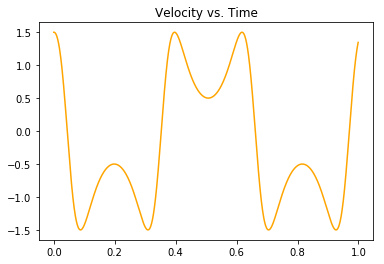

In [17]:
cromer(.001,1,.1,1.5,1,1,.1)

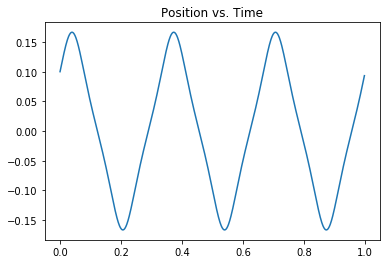

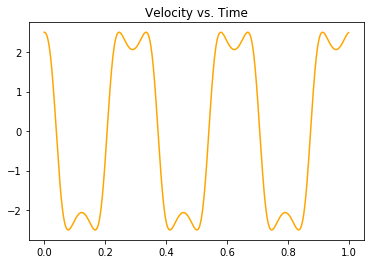

In [18]:
cromer(.001,1,.1,2.5,1,1,.1)

In [47]:
#step, time, x_0, v_0, mass, V0, d
def verlet(step, time,x_0,v_0,mass,V0,d):
    #how many indices will we need?
    n = math.ceil(time/step)
    
    #create the arrays
    t = np.zeros(n)
    v = np.zeros(n)
    x = np.zeros(n)
    a = np.zeros(n)
    
    #assign our initial conditions
    x[0]=x_0
    v[0]=v_0
    a[0]=0
    
    for i in range(n-1):
        #update acceleration
        a[i+1] = (-V0/d**4)*(4*(x[i]**3)-(4*x[i]*(d**2)))/mass
    
        #update everything else
        v[i+1] = v[i] + .5*(a[i+1]+a[i])*step
        x[i+1] = x[i] + step*v[i+1]+.5*(a[i]*(step**2))
        t[i+1] = t[i] + step
    
    fig, ax = plt.subplots()
    ax.plot(t,x)
    ax.set_title("Position vs. Time")
    fig, axs = plt.subplots()
    axs.plot(t,v, color='orange')
    axs.set_title("Velocity vs. Time")

In [20]:
# Verlet methods

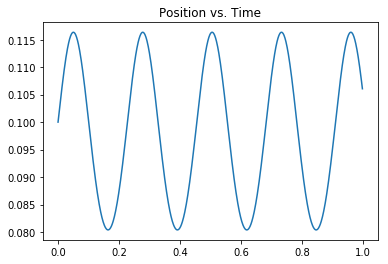

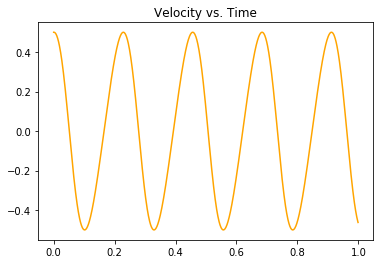

In [48]:
verlet(.001,1,.1,.5,1,1,.1)

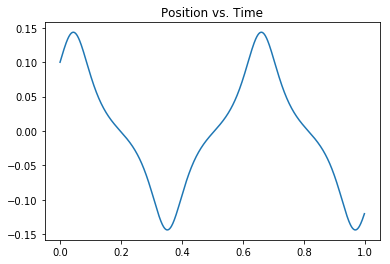

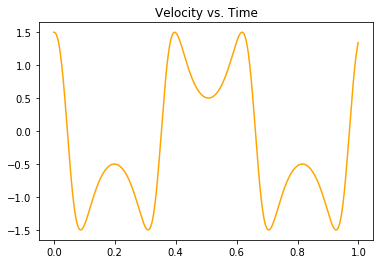

In [22]:
verlet(.001,1,.1,1.5,1,1,.1)

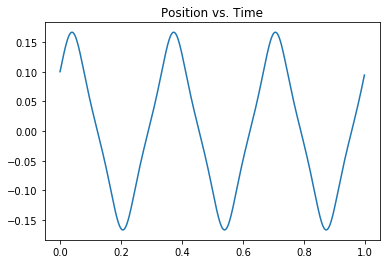

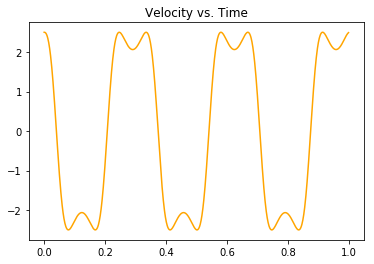

In [23]:
verlet(.001,1,.1,2.5,1,1,.1)

In [24]:
# Euler Cromer without x^4 term

In [25]:
#step, time, x_0, v_0, mass, V0, d
def cromer_2(step, time,x_0,v_0,mass,V0,d):
    #how many indices will we need?
    n = math.ceil(time/step)
    
    #create the arrays
    t = np.zeros(n)
    v = np.zeros(n)
    x = np.zeros(n)
    
    #assign our initial conditions
    x[0]=x_0
    v[0]=v_0
    
    for i in range(n-1):
        #update acceleration
        a = (V0/d**4)*((4*x[i]*(d**2)))/mass
    
        #update everything else
        v[i+1] = v[i] + step*a
        x[i+1] = x[i] + step*v[i+1]
        t[i+1] = t[i] + step
    
    pfig, ax = plt.subplots()
    ax.plot(t,x)
    ax.set_title("Position vs. Time")
    fig, axs = plt.subplots()
    axs.plot(t,v, color='orange')
    axs.set_title("Velocity vs. Time")

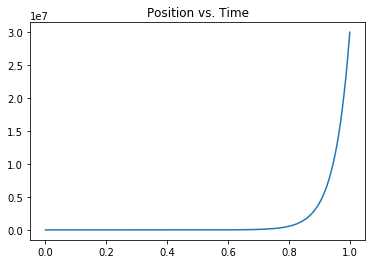

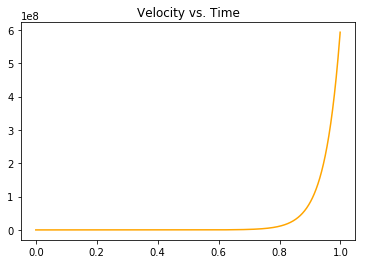

In [26]:
cromer_2(.001,1,.1,.5,1,1,.1)

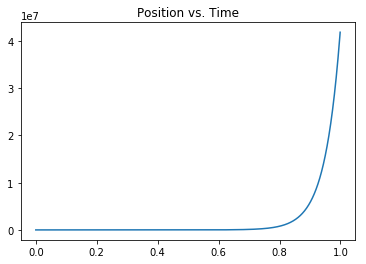

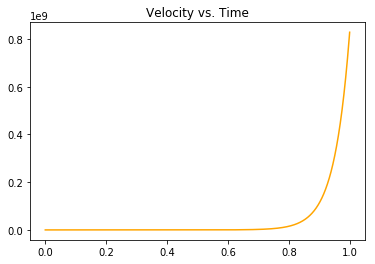

In [27]:
cromer_2(.001,1,.1,1.5,1,1,.1)

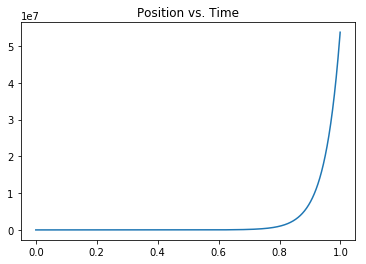

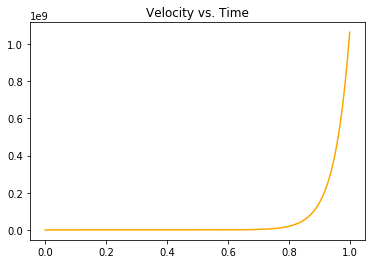

In [28]:
cromer_2(.001,1,.1,2.5,1,1,.1)

In [29]:
# Velocity Verlet method without x^4 term

In [30]:
#step, time, x_0, v_0, mass, V0, d
def verlet_2(step, time,x_0,v_0,mass,V0,d):
    #how many indices will we need?
    n = math.ceil(time/step)
    
    #create the arrays
    t = np.zeros(n)
    v = np.zeros(n)
    x = np.zeros(n)
    a = np.zeros(n)
    
    #assign our initial conditions
    x[0]=x_0
    v[0]=v_0
    a[0]=0
    
    for i in range(n-1):
        #update acceleration
        a[i+1] = (V0/d**4)*((4*x[i]*(d**2)))/mass
    
        #update everything else
        v[i+1] = v[i] + .5*(a[i+1]+a[i])*step
        x[i+1] = x[i] + step*v[i+1]+.5*(a[i]*(step**2))
        t[i+1] = t[i] + step
    
    fig, ax = plt.subplots()
    ax.plot(t,x)
    ax.set_title("Position vs. Time")
    fig, axs = plt.subplots()
    axs.plot(t,v, color='orange')
    axs.set_title("Velocity vs. Time")

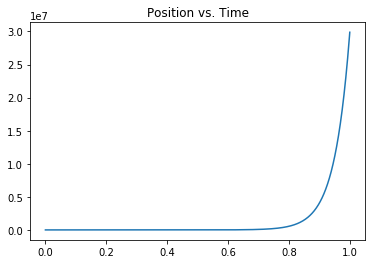

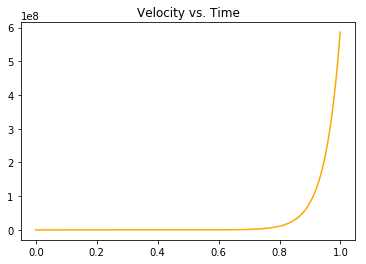

In [31]:
verlet_2(.001,1,.1,.5,1,1,.1)

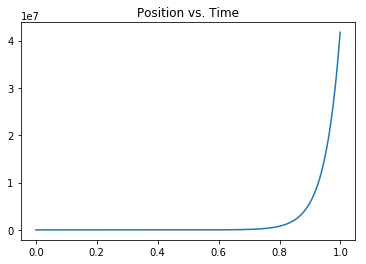

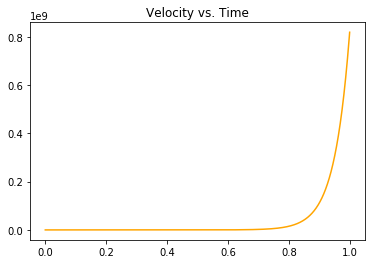

In [32]:
verlet_2(.001,1,.1,1.5,1,1,.1)

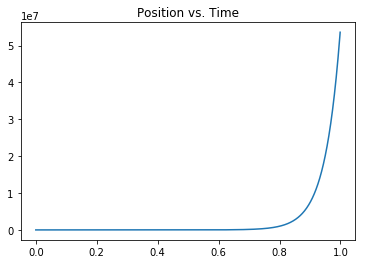

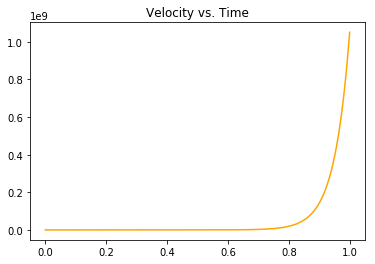

In [33]:
verlet_2(.001,1,.1,2.5,1,1,.1)

In [34]:
# Differences and Comparison of Euler/Cromer
# There is very clearly a massive difference beteween the motion of the particle with the potential containing the x^4 term
# and without the x^4 term. With the x^4 term, the potential stays negative and allows for the type of harmonic motion we see
# in the sinusoidal graphs. Later, upon removal of the x^4 term, taking the negative derivative of potential (to find force)
# the potnetial stays postivie, and the velocity of the particle containues to incrase for as long as we have defined time
# (and if we define it long enough we would see it stay this way). 
# Graphing the results of cromer and verlet, we find that they are both immensely similar, as is evident by our plots. 


In [35]:
# Part 1 number 9
# We used python to make a graph of the potnetial for each of the cases
# Here we used both euler-cromer and velocity-verlet numerical methods to update the array of potential
# Below you will see very similar results for the potential using both methods, this gives a great picture of the particle's
# motion
#
# Graphs and code below

In [ ]:
#step, time, x_0, v_0, mass, V0, d
def energy_cromer(step, time,x_0,v_0,mass,V0,d):
    #how many indices will we need?
    n = math.ceil(time/step)
    
    #create the arrays
    t = np.zeros(n)
    v = np.zeros(n)
    x = np.zeros(n)
    a = np.zeros(n)
    V = np.zeros(n)
    
    #assign our initial conditions
    x[0]=x_0
    v[0]=v_0
    a[0]=0
    V[0]=0
    
    for i in range(n-1):
        #update acceleration
        a = (-V0/d**4)*(4*(x[i]**3)-(4*x[i]*(d**2)))/mass
    
        #update potential
        V[i+1] = (V0/d**4)*((x[i]**4)-(2*((x[i])**2)*(d**2))+(d**4))
    
        #update everything else
        v[i+1] = v[i] + step*a
        x[i+1] = x[i] + step*v[i+1]
        t[i+1] = t[i] + step
    energy_cromer(.001,1,.1,2.5,1,1,.1)
    plt.plot(t,V, label="Potential")
    plt.legend()
    plt.grid()

In [50]:
energy_cromer(.001,1,.1,.5,1,1,.1)

RecursionError: maximum recursion depth exceeded in comparison

In [51]:
energy_cromer(.001,1,.1,1.5,1,1,.1)

RecursionError: maximum recursion depth exceeded in comparison

In [57]:
energy_cromer(.001,1,.1,2.5,1,1,.1)

RecursionError: maximum recursion depth exceeded in comparison

In [53]:

#step, time, x_0, v_0, mass, V0, d
def energy_verlet(step, time,x_0,v_0,mass,V0,d):
    #how many indices will we need?
    n = math.ceil(time/step)
    
    #create the arrays
    t = np.zeros(n)
    v = np.zeros(n)
    x = np.zeros(n)
    a = np.zeros(n)
    V = np.zeros(n)
    
    #assign our initial conditions
    x[0]=x_0
    v[0]=v_0
    a[0]=0
    V[0]=0
    
    for i in range(n-1):
        #update acceleration
        a[i+1] = (-V0/d**4)*(4*(x[i]**3)-(4*x[i]*(d**2)))/mass
    
        #update potential
        V[i+1] = (V0/d**4)*((x[i]**4)-(2*((x[i])**2)*(d**2))+(d**4))
        
        #update everything else
        v[i+1] = v[i] + .5*(a[i+1]+a[i])*step
        x[i+1] = x[i] + step*v[i+1]+.5*(a[i]*(step**2))
        t[i+1] = t[i] + step
        
    
    plt.plot(t,V, label="Potential")
    plt.legend()
    plt.grid()
    

In [ ]:
# Plot of potential with energy verlet

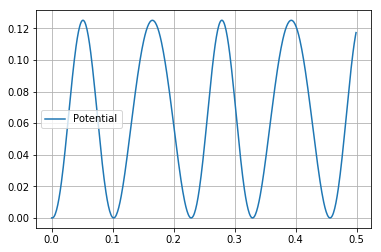

In [54]:
energy_verlet(.001,.5,.1,.5,1,1,.1)

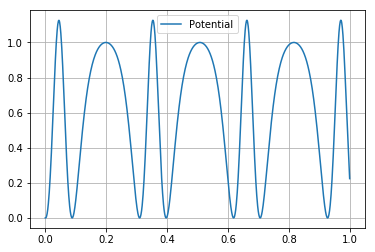

In [55]:
energy_verlet(.001,1,.1,1.5,1,1,.1)

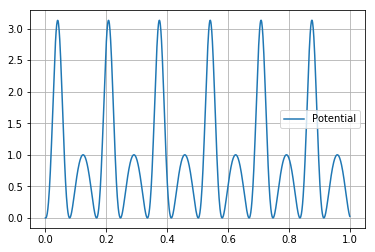

In [56]:
energy_verlet(.001,1,.1,2.5,1,1,.1)

In [64]:

# Naturally, in the euler-cromer method, energy is added to the system and therefore this method does not conserve energy.
# Verlet method conserves energy. 


In [ ]:
# Damping Motion

In [65]:
def cromer_damping(dt,v0,tfinal,beta = .1):
    beta = beta
    n = int(tfinal/dt)
    d = .1
    V0 = 1
    m = 1
   
    x = np.zeros(n)
    v = np.zeros(n)
    t = np.zeros(n)
   
    v[0] = v0
    x[0] = d
   
    for i in range(n-1):
        a = ((-V0/(d**4)*m)*(4*x[i]**3 - 4*x[i]*d**2))-(beta*v[i])
        v[i+1] = v[i] + dt*a
        x[i+1] = x[i] + dt*v[i+1]
        t[i+1] = t[i] + dt
        
    plt.plot(t,x, label = 'Position')
    #plt.plot(t,v, label = 'Velocity')
    plt.legend()
   
    return x,v,t

(array([0.1       , 0.10049995, 0.10099945, ..., 0.10826608, 0.10807917,
        0.10788501]),
 array([ 0.5       ,  0.49995   ,  0.49949704, ..., -0.17947656,
        -0.186914  , -0.19416302]),
 array([0.000e+00, 1.000e-03, 2.000e-03, ..., 9.997e+00, 9.998e+00,
        9.999e+00]))

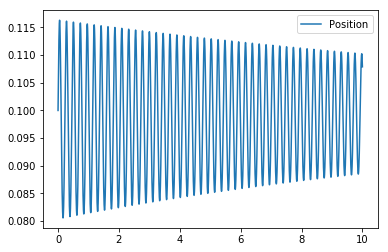

In [61]:
cromer_damping(.001,.5,10)

(array([0.1       , 0.10149985, 0.10299832, ..., 0.05802879, 0.05834528,
        0.05867712]),
 array([1.5       , 1.49985   , 1.49847301, ..., 0.30111976, 0.31648506,
        0.33184683]),
 array([0.000e+00, 1.000e-03, 2.000e-03, ..., 9.997e+00, 9.998e+00,
        9.999e+00]))

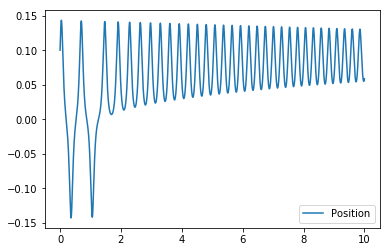

In [66]:
cromer_damping(.001,1.5,10)

(array([ 0.1       ,  0.10249975,  0.10499717, ..., -0.00435568,
        -0.00429059, -0.00422723]),
 array([2.5       , 2.49975   , 2.49742462, ..., 0.06682819, 0.06508254,
        0.06336295]),
 array([0.000e+00, 1.000e-03, 2.000e-03, ..., 9.997e+00, 9.998e+00,
        9.999e+00]))

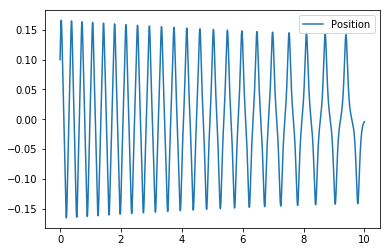

In [67]:
cromer_damping(.001,2.5,10)

In [68]:
def verlet_damping(dt,v0,tfinal,gamma = .1):
    V0 = 1
    d = .1
    m = 1
    tfinal = tfinal
    DeltaT2 = dt
    n = int(tfinal/DeltaT2)
    t2 = np.zeros(n)
    x2 = np.zeros(n)
    v2 = np.zeros(n)
    x2[0] = d
    v2[0] = v0
   
    for i in range(n-1):
        a = (-V0/(d**4)*m)*(4*x2[i]**3 - 4*x2[i]*d**2)-(gamma*v2[i])
       
        x2[i+1] = x2[i] + v2[i]*DeltaT2 + a*((DeltaT2**2)/2)
        a1 = (-V0/(d**4)*m)*(4*x2[i+1]**3 - 4*x2[i+1]*d**2)
        v2[i+1] = v2[i] + (a1+a)*(DeltaT2/2)
        t2[i+1] = t2[i] + DeltaT2
       
    plt.plot(t2,x2,label='Position')
    #plt.plot(t2,v2,label='Velocity')
    plt.legend()
       
    return x2,v2,t2

(array([0.1       , 0.10049998, 0.10099952, ..., 0.10115093, 0.10159108,
        0.10202991]),
 array([0.5       , 0.49977351, 0.4991412 , ..., 0.44064277, 0.43950069,
        0.43799016]),
 array([0.000e+00, 1.000e-03, 2.000e-03, ..., 4.997e+00, 4.998e+00,
        4.999e+00]))

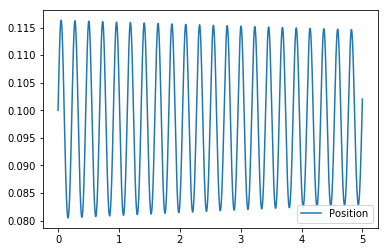

In [69]:
verlet_damping(.001,.5,5)

(array([0.1       , 0.10149993, 0.10299855, ..., 0.14035084, 0.1402646 ,
        0.14012409]),
 array([ 1.5       ,  1.49931146,  1.49736906, ..., -0.05901773,
        -0.11337707, -0.16751148]),
 array([0.000e+00, 1.000e-03, 2.000e-03, ..., 4.997e+00, 4.998e+00,
        4.999e+00]))

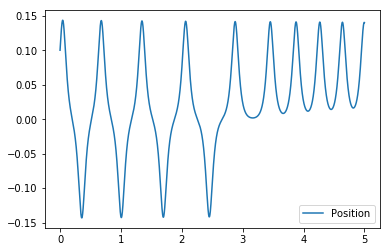

In [70]:
verlet_damping(.001,1.5,5)

(array([0.1       , 0.10249988, 0.10499755, ..., 0.08107097, 0.08313067,
        0.08520054]),
 array([2.5       , 2.49883724, 2.49552317, ..., 2.05424577, 2.06483677,
        2.07454029]),
 array([0.000e+00, 1.000e-03, 2.000e-03, ..., 4.997e+00, 4.998e+00,
        4.999e+00]))

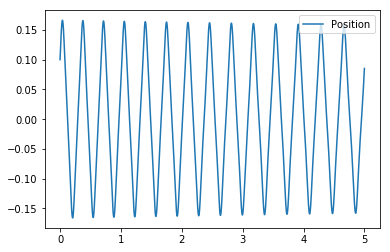

In [71]:
verlet_damping(.001,2.5,5)

In [94]:

#step, time, x_0, v_0, mass, V0, d
def energy_verlet_2(step, time,x_0,v_0,m,V0,d):
    #how many indices will we need?
    n = math.ceil(time/step)
    
    #create the arrays
    t = np.zeros(n)
    v = np.zeros(n)
    x = np.zeros(n)
    a = np.zeros(n)
    V = np.zeros(n)
    
    
    #assign our initial conditions
    x[0]=x_0
    v[0]=v_0
    a[0]=0
    V[0]=V0
    
    for i in range(n-1):
        #update acceleration
        a[i] = (-V0/((d**4)*m))*(4*x[i]**3 - 4*x[i]*d**2)-(0.1*v[i])

        #update potential
        V[i+1] = (V0/d**4)*((x[i]**4)-(2*(x[i]**2)*(d**2))+(d**4))
                
        #update everything else
        v[i+1] = v[i] + .5*(a[i+1]+a[i])*step
        x[i+1] = x[i] + step*v[i+1]+.5*(a[i]*(step**2))
        t[i+1] = t[i] + step
                
        
        
    
    plt.plot(t,V, label="Potential")
    plt.legend()
    plt.grid()

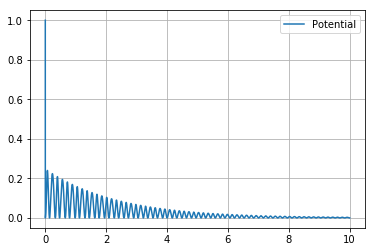

In [101]:
#step, time, x_0, v_0, mass, V0, d
energy_verlet_2(.001,10,.1,.5,1,1,.1)

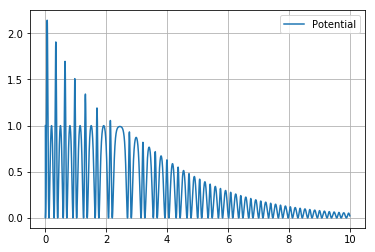

In [102]:
#step, time, x_0, v_0, mass, V0, d
energy_verlet_2(.001,10,.1,1.5,1,1,.1)

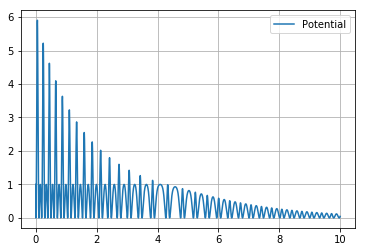

In [103]:
#step, time, x_0, v_0, mass, V0, d
energy_verlet_2(.001,10,.1,2.5,1,1,.1)

In [ ]:
# for the dampening condition as can be seen from the above graphs the energy is not conserved and the 
# potential energy eventually decays to zero.

In [ ]:
# Part 2

In [104]:
def cromer_vector(dt,vel0,tfinal):
    V0 = 1
    m = 1
    d = .1
   
    n = int(tfinal/dt)
   
    r = np.zeros([n,2])
    v = np.zeros([n,2])
    t = np.zeros(n)
   
   
    r0 = np.array([d,0])
    v0 = np.array([0,vel0])
   
    r[0] = r0
    v[0] = v0
   
    for i in range(n-1):
        rabs = np.sqrt(sum(r[i]*r[i]))
        a = (((-4*V0)/(m*d**4))*((rabs**3)-(rabs*d**2)))*(r[i]/rabs)
        v[i+1] = v[i] + dt*a
        r[i+1] = r[i] + dt*v[i+1]
        t[i+1] = t[i] + dt
       
    plt.plot(r[:,0],r[:,1])  
       
    return r,v,t

(array([[0.1       , 0.        ],
        [0.1       , 0.005     ],
        [0.09999   , 0.0099995 ],
        ...,
        [0.09155476, 0.05226051],
        [0.08914098, 0.05634391],
        [0.08632757, 0.06017472]]), array([[ 0.        ,  0.5       ],
        [ 0.        ,  0.5       ],
        [-0.001     ,  0.49995   ],
        ...,
        [-0.20060228,  0.43161516],
        [-0.2413784 ,  0.40833968],
        [-0.28134029,  0.3830807 ]]), array([0.000e+00, 1.000e-02, 2.000e-02, ..., 1.997e+01, 1.998e+01,
        1.999e+01]))

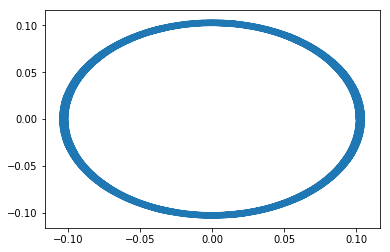

In [105]:
#step, time, x_0, v_0, mass, V0, d
cromer_vector(.01,.5,20)

(array([[ 0.1       ,  0.        ],
        [ 0.1       ,  0.01      ],
        [ 0.09996   ,  0.019996  ],
        ...,
        [-0.05693007,  0.08226792],
        [-0.06531759,  0.07682306],
        [-0.07366117,  0.07132652]]), array([[ 0.        ,  1.        ],
        [ 0.        ,  1.        ],
        [-0.004     ,  0.9996    ],
        ...,
        [-0.83895744, -0.54418887],
        [-0.83875147, -0.54448651],
        [-0.83435768, -0.54965424]]), array([0.000e+00, 1.000e-02, 2.000e-02, ..., 1.997e+01, 1.998e+01,
        1.999e+01]))

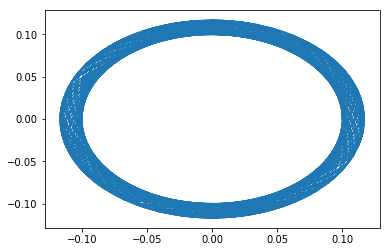

In [106]:
cromer_vector(.01,1,20)

(array([[ 0.1       ,  0.        ],
        [ 0.1       ,  0.015     ],
        [ 0.09991   ,  0.0299865 ],
        ...,
        [-0.06035159,  0.10255042],
        [-0.07352378,  0.10007847],
        [-0.08510156,  0.09543624]]), array([[ 0.        ,  1.5       ],
        [ 0.        ,  1.5       ],
        [-0.009     ,  1.49865   ],
        ...,
        [-1.417618  , -0.07659591],
        [-1.31721947, -0.24719475],
        [-1.15777738, -0.46422277]]), array([0.000e+00, 1.000e-02, 2.000e-02, ..., 1.997e+01, 1.998e+01,
        1.999e+01]))

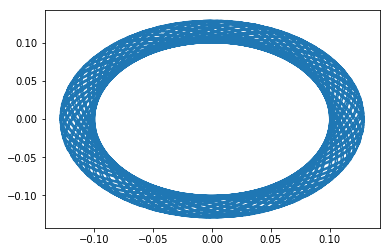

In [107]:
cromer_vector(.01,1.5,20)

In [ ]:
# Energy is not conserved because with using the cromer method energy is constantly being added to the system so the overall
# energy is increasing. 

In [ ]:
# Stable radius

(array([[ 0.1       ,  0.        ],
        [ 0.1       ,  0.002     ],
        [ 0.0999984 ,  0.00399997],
        ...,
        [-0.02862498,  0.09683154],
        [-0.03050951,  0.09621953],
        [-0.03237096,  0.09553477]]),
 array([[ 0.00000000e+00,  2.00000000e-01],
        [ 0.00000000e+00,  2.00000000e-01],
        [-1.60000000e-04,  1.99996800e-01],
        ...,
        [-1.90693462e-01, -5.36195513e-02],
        [-1.88452281e-01, -6.12009356e-02],
        [-1.86145425e-01, -6.84761973e-02]]),
 array([0.000e+00, 1.000e-02, 2.000e-02, ..., 1.997e+01, 1.998e+01,
        1.999e+01]))

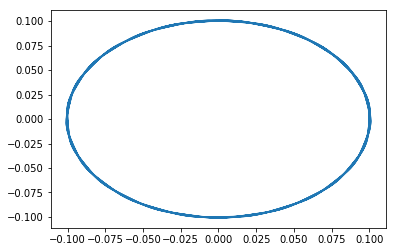

In [108]:
# number 5
# Almost stable radius
cromer_vector(.01,.2,20)

In [ ]:
# Above you can see a stable orbit of initial velocity = .2m/s and initial position = r[d,0] 

In [ ]:
# Part 3

In [112]:
def force(x):
    V0 = 1
    d = .1
    mass = 1
    return (-V0/d**4)*(4*(x**3)-(4*x*(d**2)))/mass

In [110]:
def kuta(DeltaT, time,x_0,v_0):
    n = math.ceil(time/DeltaT)
    x = np.zeros(n)
    v = np.zeros(n)
    t = np.zeros(n)
    x[0]= x_0
    v[0]= v_0
    
    for i in range(n-1):
        #Setting up k1
        k1x = DeltaT*v[i]
        k1v = DeltaT* force(x[i])
        # Setting up k2
        vv = v[i]+k1v*0.5
        xx = x[i]+k1x*0.5
        k2x = DeltaT*vv
        k2v = DeltaT* force(xx)
        # Setting up k3
        vv = v[i]+k2v*0.5
        xx = x[i]+k2x*0.5
        k3x = DeltaT*vv
        k3v = DeltaT* force(xx)
        # Setting up k4
        vv = v[i]+k3v
        xx = x[i]+k3x
        k4x = DeltaT*vv
        k4v = DeltaT* force(xx)
        # Final result
        x[i+1] = x[i]+(k1x+2*k2x+2*k3x+k4x)/6.0
        v[i+1] = v[i]+(k1v+2*k2v+2*k3v+k4v)/6.0
        t[i+1] = t[i] + DeltaT
        
    plt.plot(t,x, label="Position")
    #plt.plot(t,v, label="Velocity")
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
# Kutta graphs with initial conditions

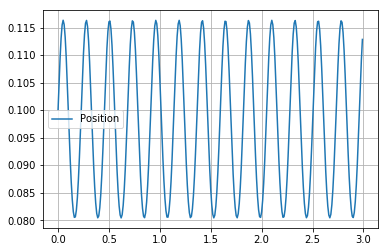

In [113]:
kuta(.01,3,.1,.5)

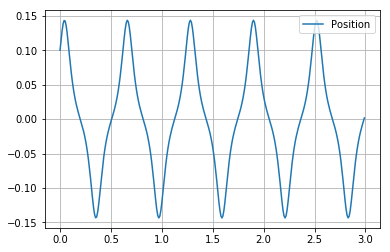

In [114]:
kuta(.01,3,.1,1.5)

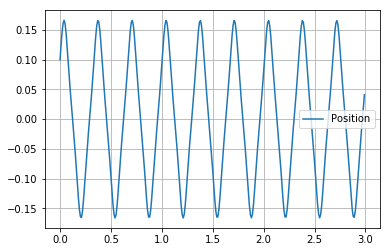

In [115]:
kuta(.01,3,.1,2.5)

In [ ]:
# Upon inspection we see that the graphs of kutta are immensely similar to the earlier graphs of cromer and verlet

In [116]:
def kuta_damping(DeltaT, time,x_0,v_0,gamma):
    n = math.ceil(time/DeltaT)
    x = np.zeros(n)
    v = np.zeros(n)
    t = np.zeros(n)
    x[0]= x_0
    v[0]= v_0
    
    for i in range(n-1):
        #Setting up k1
        k1x = DeltaT*v[i]
        k1v = DeltaT* (force(x[i]) - gamma*(v[i]))
        # Setting up k2
        vv = v[i]+k1v*0.5
        xx = x[i]+k1x*0.5
        k2x = DeltaT*vv
        k2v = DeltaT* (force(xx)- gamma*(v[i]))
        # Setting up k3
        vv = v[i]+k2v*0.5
        xx = x[i]+k2x*0.5
        k3x = DeltaT*vv
        k3v = DeltaT* (force(xx)- gamma*(v[i]))
        # Setting up k4
        vv = v[i]+k3v
        xx = x[i]+k3x
        k4x = DeltaT*vv
        k4v = DeltaT* (force(xx)- gamma*(v[i]))
        # Final result
        x[i+1] = x[i]+(k1x+2*k2x+2*k3x+k4x)/6.0
        v[i+1] = v[i]+(k1v+2*k2v+2*k3v+k4v)/6.0
        t[i+1] = t[i] + DeltaT
        
    plt.plot(t,x, label="Position")
    #plt.plot(t,v, label="Velocity")
    plt.legend()
    plt.grid()
    plt.show()

In [117]:
# Kuta damping

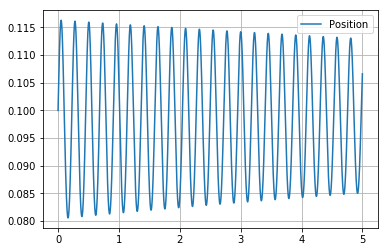

In [118]:
kuta_damping(.001,5,.1,.5,.1)

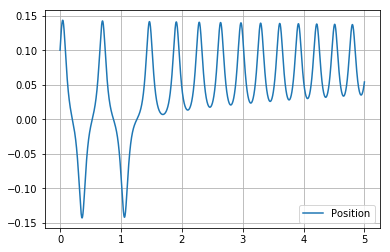

In [119]:
kuta_damping(.001,5,.1,1.5,.1)

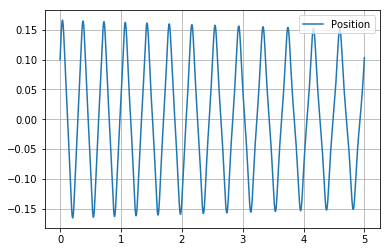

In [120]:
kuta_damping(.001,5,.1,2.5,.1)

In [ ]:
# Add periodice driving force
# Note periodic driving force only, no damping

In [45]:
def kuta_driving(DeltaT, time,x_0,v_0,gamma,w,F0):
    n = math.ceil(time/DeltaT)
    x = np.zeros(n)
    v = np.zeros(n)
    t = np.zeros(n)
    x[0]= x_0
    v[0]= v_0
    
    for i in range(n-1):
        #Setting up k1
        k1x = DeltaT*v[i]
        k1v = DeltaT* (force(x[i]) + F0*math.cos(w*t[i]))
        # Setting up k2
        vv = v[i]+k1v*0.5
        xx = x[i]+k1x*0.5
        k2x = DeltaT*vv
        k2v = DeltaT* (force(xx)+ F0*math.cos(w*t[i]))
        # Setting up k3
        vv = v[i]+k2v*0.5
        xx = x[i]+k2x*0.5
        k3x = DeltaT*vv
        k3v = DeltaT* (force(xx)+ F0*math.cos(w*t[i]))
        # Setting up k4
        vv = v[i]+k3v
        xx = x[i]+k3x
        k4x = DeltaT*vv
        k4v = DeltaT* (force(xx)+ F0*math.cos(w*t[i]))
        # Final result
        x[i+1] = x[i]+(k1x+2*k2x+2*k3x+k4x)/6.0
        v[i+1] = v[i]+(k1v+2*k2v+2*k3v+k4v)/6.0
        t[i+1] = t[i] + DeltaT
        
    plt.plot(t,x, label="Position")
    #plt.plot(t,v, label="Velocity")
    plt.legend()
    plt.grid()
    plt.show()

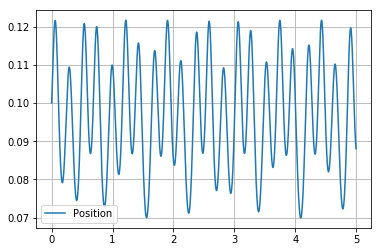

In [121]:
kuta_driving(.001,5,.1,.5,.1,10,5)

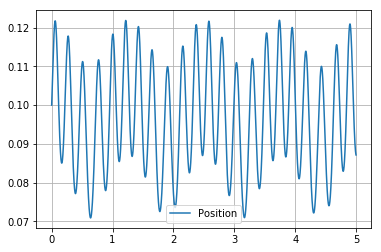

In [123]:
kuta_driving(.001,5,.1,.5,.1,5,5)

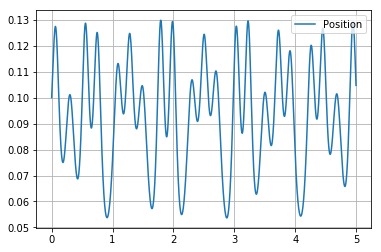

In [122]:
kuta_driving(.001,5,.1,.5,.1,10,10)

In [124]:
def kuta_stability(DeltaT, time,x_0,v_0,gamma,w,F0):
    n = math.ceil(time/DeltaT)
    x = np.zeros(n)
    v = np.zeros(n)
    t = np.zeros(n)
    x[0]= x_0
    v[0]= v_0
    
    for i in range(n-1):
        #Setting up k1
        k1x = DeltaT*v[i]
        k1v = DeltaT* (force(x[i]) - gamma*(v[i])+ F0*math.cos(w*t[i]))
        # Setting up k2
        vv = v[i]+k1v*0.5
        xx = x[i]+k1x*0.5
        k2x = DeltaT*vv
        k2v = DeltaT* (force(xx)- gamma*(v[i])+ F0*math.cos(w*t[i]))
        # Setting up k3
        vv = v[i]+k2v*0.5
        xx = x[i]+k2x*0.5
        k3x = DeltaT*vv
        k3v = DeltaT* (force(xx)- gamma*(v[i])+ F0*math.cos(w*t[i]))
        # Setting up k4
        vv = v[i]+k3v
        xx = x[i]+k3x
        k4x = DeltaT*vv
        k4v = DeltaT* (force(xx)- gamma*(v[i])+ F0*math.cos(w*t[i]))
        # Final result
        x[i+1] = x[i]+(k1x+2*k2x+2*k3x+k4x)/6.0
        v[i+1] = v[i]+(k1v+2*k2v+2*k3v+k4v)/6.0
        t[i+1] = t[i] + DeltaT
        
    plt.plot(t,x, label="Position")
    #plt.plot(t,v, label="Velocity")
    plt.legend()
    plt.grid()
    plt.show()

In [40]:
# Here we tune the values of omega and F0 to make the position graph stable in one and two wells

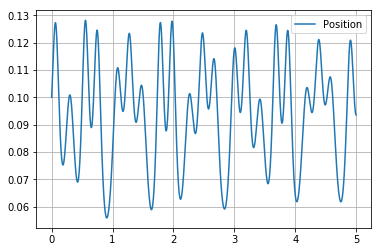

In [125]:
kuta_stability(.001,5,.1,.5,.1,10,10)

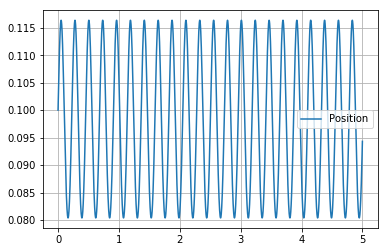

In [126]:
kuta_driving(.001,5,.1,.5,.1,1000,1)

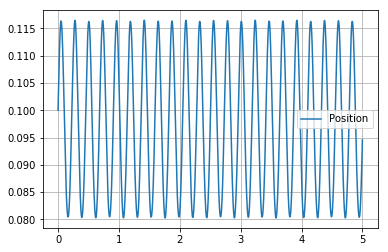

In [127]:
kuta_driving(.001,5,.1,.5,.1,100,1)

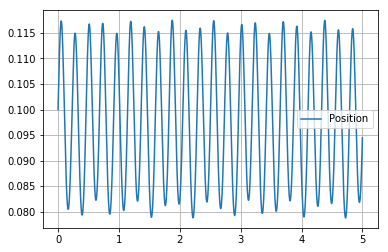

In [128]:
kuta_driving(.001,5,.1,.5,.1,10,1)

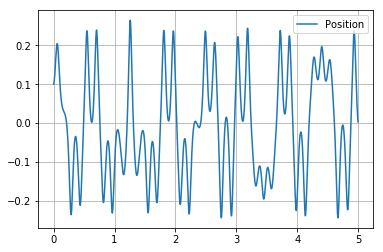

In [129]:
kuta_driving(.001,5,.1,.5,.1,10,100)

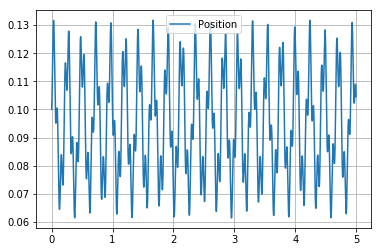

In [130]:
kuta_driving(.001,5,.1,.5,.1,100,100)

In [131]:
# Varying step sizes

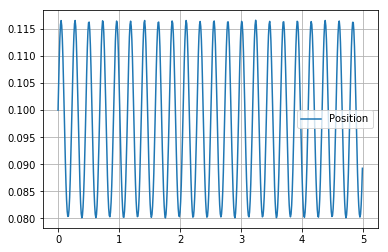

In [132]:
kuta_driving(.01,5,.1,.5,.1,100,1)

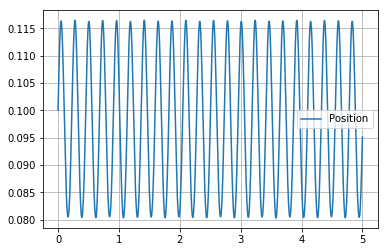

In [133]:
kuta_driving(.0001,5,.1,.5,.1,100,1)

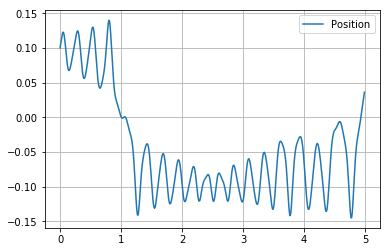

In [134]:
kuta_driving(.01,5,.1,.5,.1,50,10)

In [135]:
# Now we compare some of these to the cromer damping, note we do not add the driving force in here so these should look 
# different. Note this is only true for the kuta graphs where an initial driving force is present, for kuta damping and euler
# damping where the only difference is the method of calculation the graphs should be more or less identical.
# Upon inspection this is in fact what we see

(array([0.1       , 0.10049995, 0.10099945, ..., 0.10598074, 0.10632715,
        0.10666799]),
 array([0.5       , 0.49995   , 0.49949704, ..., 0.35167485, 0.34641731,
        0.34083042]),
 array([0.000e+00, 1.000e-03, 2.000e-03, ..., 4.997e+00, 4.998e+00,
        4.999e+00]))

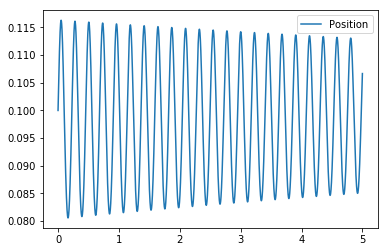

In [136]:
cromer_damping(.001,.5,5)

(array([0.1       , 0.10149985, 0.10299832, ..., 0.05259861, 0.05330595,
        0.05402847]),
 array([1.5       , 1.49985   , 1.49847301, ..., 0.69218429, 0.70733372,
        0.72252656]),
 array([0.000e+00, 1.000e-03, 2.000e-03, ..., 4.997e+00, 4.998e+00,
        4.999e+00]))

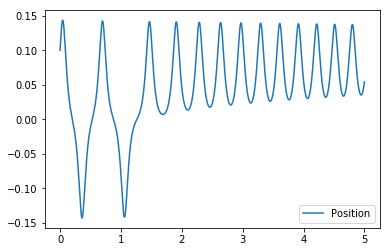

In [137]:
cromer_damping(.001,1.5,5)

(array([0.1       , 0.10249975, 0.10499717, ..., 0.10024037, 0.1020422 ,
        0.10384217]),
 array([2.5       , 2.49975   , 2.49742462, ..., 1.80220317, 1.80182995,
        1.79996562]),
 array([0.000e+00, 1.000e-03, 2.000e-03, ..., 4.997e+00, 4.998e+00,
        4.999e+00]))

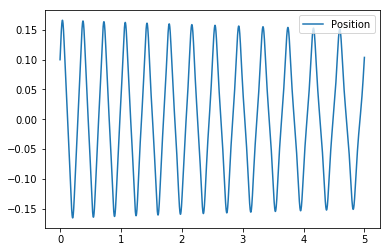

In [138]:
cromer_damping(.001,2.5,5)

In [139]:
# Study stablility

In [140]:
# Part 4

In [141]:
# Derivation of solution on paper

In [142]:
def anharmonic(x0,v0,a,gamma,tf,step,d):

    n = math.ceil(tf/step)
    t = np.linspace(0,tf,n)
    y = np.zeros(n)
    
    
    # Define the constants
    H = 1 #We dont need to use this only graph times greater than 0

    for i in range(n):
        P1 = a*( ( (t[i]**2)/(2*gamma) ) - ( (t[i])/(gamma**2)) - (((1/(gamma**3))*math.exp(-gamma*t[i]))) + (1/(gamma**3)))
        P2 = 0 # this will always be zero due to the fact that in our question beta = 0
        P3 = 6*d*( ( (t[i]**4)/(24*gamma) ) - ( ( t[i]**3 )/( 6*(gamma**3) ) ) + ( ( t[i]**2 )/(2*(gamma**3)) ) - ( t[i]/(gamma**4) ) - (( 1/(gamma**5) )*(math.exp(-gamma*t[i]))) + (1/(gamma**5)) )
        P4 = 0 # this equates to zero    
        P5 = v0*( (1/gamma) - ((1/gamma)*math.exp(-gamma*t[i])) )
        P6 = gamma*x0*( (1/gamma) - ((1/gamma)*math.exp(-gamma*t[i])) )
        y[i] = P1 + P2 + P3 + P4 + P5 + P6
        

    plt.plot(t,y, label="Analytical Position")
    plt.legend()
    plt.grid()
    plt.show()
    
    

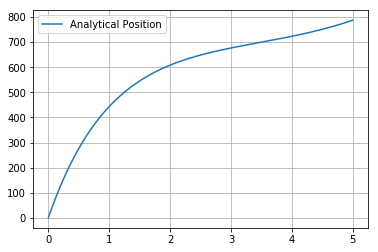

In [143]:
#x0,v0,a,gamma,tf,step,d
#cromer(.001,1,.1,.5,1,1,.1)
anharmonic(1,700,1,1,5,.01,1)

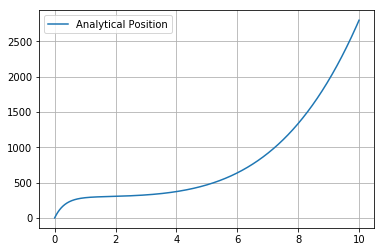

In [144]:
#x0,v0,a,gamma,tf,step,d
anharmonic(300,0,5,3,10,.01,3)

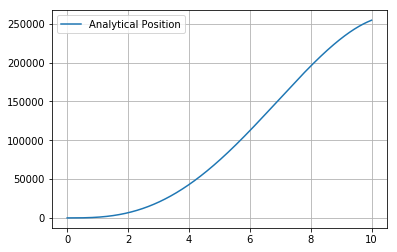

In [145]:
#x0,v0,a,gamma,tf,step,d
anharmonic(1,.1,22266,.1,10,.001,3)

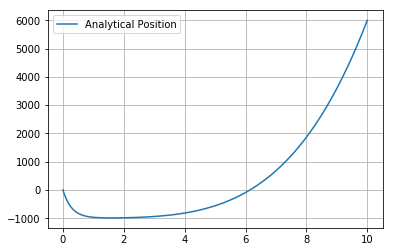

In [146]:
anharmonic(-1000,2,2,3.5,10,.001,10)

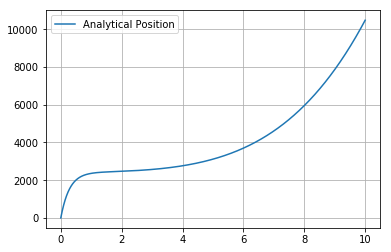

In [147]:
anharmonic(1000,5000,80,3.5,10,.001,10)

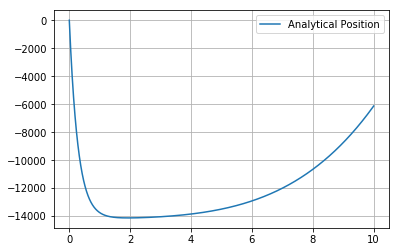

In [148]:
anharmonic(100,-50000,80,3.5,10,.001,10)

In [149]:
# Study of analyical solutions